#     Task -3 -- Customer Segmentation Analysis With Python
(Market Basket Analysis)
---



---




In [ ]:
# Importing neecessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading of dataset into data frame
mar=pd.read_csv("Mall_Customers.csv")

## Exploratory Data Analysis - EDA

In [ ]:
# Displays the information or summary about dataframe
mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Displays first 5 records in the data frame
mar.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Displays the last 5 records of data
mar.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
# Displays the total number of records and columns
mar.shape

(200, 5)

In [ ]:
# Displays the columns present in the data frame
mar.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Displays data types of each and every column
mar.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# Dropping Customer Id column as it is unnecessary
mar=mar.drop(columns='CustomerID',axis=1)

In [ ]:
# Confirming whether the customerId column is dropped or not
print(mar)

      Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


In [ ]:
mar.shape

(200, 4)

### Missing Values

In [ ]:
# Displays the totalnumber of missing values if present
mar.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<--------No Missing values found in the data frame -------->

## Outlier Analysis

In [ ]:
mar1=mar.copy()

<Axes: >

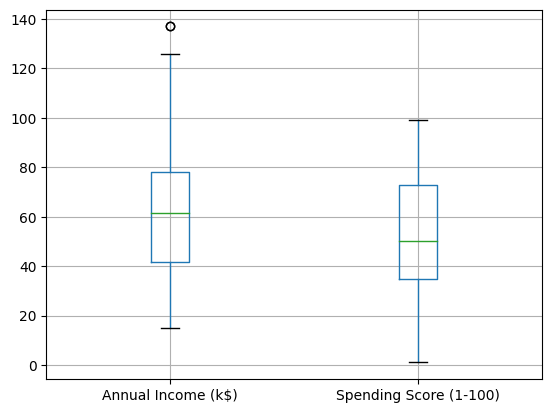

In [ ]:
# Boxplot for outlier visualization
mar1.boxplot(column=['Annual Income (k$)','Spending Score (1-100)'])

<--------- Annual Income contains outliers----------->

In [ ]:
Q1=mar1.quantile(0.25)
Q2=mar1.quantile(0.50)
Q3=mar1.quantile(0.75)
print(Q1,Q2,Q3)

Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64 Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
Name: 0.5, dtype: float64 Age                       49.0
Annual Income (k$)        78.0
Spending Score (1-100)    73.0
Name: 0.75, dtype: float64


<ipython-input-64-a978be87d6d0>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=mar1.quantile(0.25)
<ipython-input-64-a978be87d6d0>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q2=mar1.quantile(0.50)
<ipython-input-64-a978be87d6d0>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=mar1.quantile(0.75)


In [ ]:
# Interquartile Range
iqr=Q3-Q1
print(iqr)

Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [ ]:
# Outlier Detection
lower_bound=Q1-(1.5*iqr)
upper_bound=Q3+(1.5*iqr)

In [ ]:
out=((mar1<lower_bound)|(mar1>upper_bound))
print(out)

       Age  Annual Income (k$)  Genre  Spending Score (1-100)
0    False               False  False                   False
1    False               False  False                   False
2    False               False  False                   False
3    False               False  False                   False
4    False               False  False                   False
..     ...                 ...    ...                     ...
195  False               False  False                   False
196  False               False  False                   False
197  False               False  False                   False
198  False                True  False                   False
199  False                True  False                   False

[200 rows x 4 columns]


<ipython-input-67-c0292ad50e7d>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  out=((mar1<lower_bound)|(mar1>upper_bound))


<------It is understood that Annual Income has 2 outliers ------->

In [ ]:
# To find out rows with atleat 1 outlier
out_rows=out.any(axis=1)

# Display the rows with at least one outlier
out_data=mar1[out_rows]
print(out_data)

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
198  Male   32                 137                      18
199  Male   30                 137                      83


In [ ]:
# Removal of ouliers
no_out=mar1[~out.any(axis=1)]
print(no_out)

      Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
193  Female   38                 113                      91
194  Female   47                 120                      16
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74

[198 rows x 4 columns]


In [ ]:
# Copying back to the original data frame
mar=no_out.copy()
print(mar)

      Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
193  Female   38                 113                      91
194  Female   47                 120                      16
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74

[198 rows x 4 columns]


## Univariate Analysis

### Annual Income

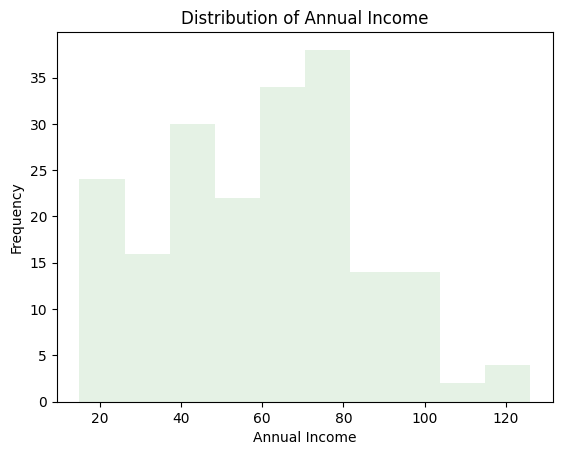

In [ ]:
plt.hist(mar['Annual Income (k$)'],bins=10,color='green',alpha=0.1)
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")
plt.show()

In [ ]:
mar['Annual Income (k$)'].describe()

count    198.000000
mean      59.787879
std       25.237259
min       15.000000
25%       40.500000
50%       61.000000
75%       77.750000
max      126.000000
Name: Annual Income (k$), dtype: float64

### Age

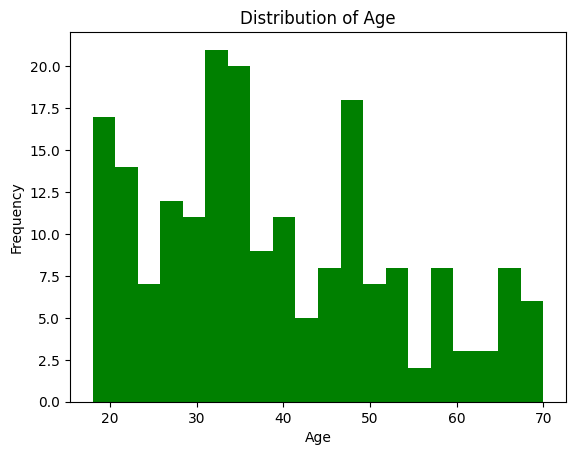

In [ ]:
plt.hist(mar['Age'],color="green",bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

<----- The genre column is actually wrongly spelled------>

In [ ]:
# Renaming Genre to Gender
mar['Gender']=mar['Genre']

In [ ]:
print(mar)

      Genre  Age  Annual Income (k$)  Spending Score (1-100)  Gender
0      Male   19                  15                      39    Male
1      Male   21                  15                      81    Male
2    Female   20                  16                       6  Female
3    Female   23                  16                      77  Female
4    Female   31                  17                      40  Female
..      ...  ...                 ...                     ...     ...
193  Female   38                 113                      91  Female
194  Female   47                 120                      16  Female
195  Female   35                 120                      79  Female
196  Female   45                 126                      28  Female
197    Male   32                 126                      74    Male

[198 rows x 5 columns]


In [ ]:
# Dropping of Genre column
mar=mar.drop(columns='Genre',axis=1)
print(mar)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender
0     19                  15                      39    Male
1     21                  15                      81    Male
2     20                  16                       6  Female
3     23                  16                      77  Female
4     31                  17                      40  Female
..   ...                 ...                     ...     ...
193   38                 113                      91  Female
194   47                 120                      16  Female
195   35                 120                      79  Female
196   45                 126                      28  Female
197   32                 126                      74    Male

[198 rows x 4 columns]


In [ ]:
mar['Gender'].value_counts()

Female    112
Male       86
Name: Gender, dtype: int64

In [ ]:
mar.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'], dtype='object')

In [ ]:
#For column extraction
X=mar.iloc[:,[1,2]].values

print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Elbow method for finding Optimal No. of Clusters

In [ ]:
# Importing necessary libraries for modelling
from sklearn.cluster import KMeans


In [ ]:
X = mar[['Annual Income (k$)', 'Spending Score (1-100)']]
wcss=[]
# Within Clusters sum of squares

In [ ]:
# For finding optimal values of Elbow method
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  # For seggregation of data into clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

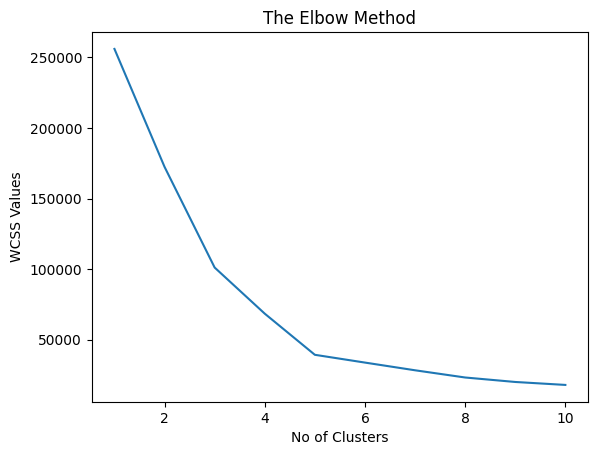

In [ ]:
# Visualization of Elbow method
plt.plot(range(1, 11), wcss)
plt.xlabel("No of Clusters")
plt.ylabel("WCSS Values")
plt.title("The Elbow Method")
plt.show()

<-------K=5------>

## Modelling Using KMeans Clustering

In [ ]:
model=KMeans(n_clusters=5, init="k-means++",random_state=0)

In [ ]:
y_kmeans=model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Converting X into numpy array
X = np.array(X)

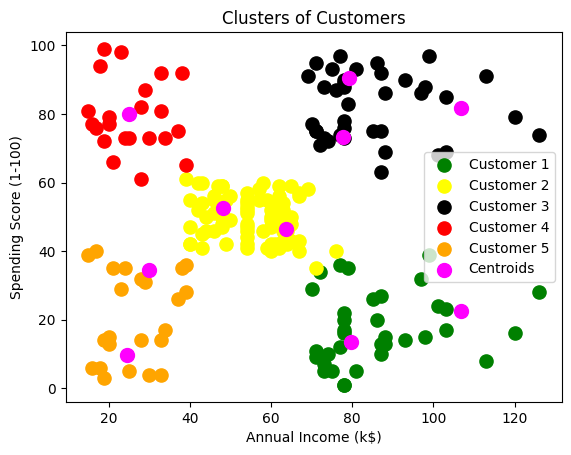

In [ ]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], c="green",label="Customer 1",s=90)
plt.scatter(X[y_kmeans== 1,0], X[y_kmeans==1,1], c="yellow",label="Customer 2",s=90)
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], c="black",label="Customer 3",s=90)
plt.scatter(X[y_kmeans== 3,0], X[y_kmeans==3,1],c ="red",label="Customer 4",s=90)
plt.scatter(X[y_kmeans== 4,0], X[y_kmeans==4,1],c="orange",label="Customer 5",s=90)
plt.scatter(kmeans.cluster_centers_[: ,0], kmeans.cluster_centers_[: ,1], s=100,c="magenta",label="Centroids") # For centroids
plt.title("Clusters of Customers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<-----------------Insights---------->

*    Customer 1 are considered as target customers as their Annual Income and Spending score are quite good,Will also consider other customers as well.
*    Customer 2 has high Annual Salary but less Spending Score
*    Customer 3 has less Annual Income but high spending score

